In [26]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt # plotting tool

In [27]:
%matplotlib inline

In [28]:
path_salt = "/kaggle/input/ocean-data/salt_month.cdf"
path_temp = "/kaggle/input/ocean-data/temp_month.cdf"

salt_data = nc.Dataset(path_salt)
temp_data = nc.Dataset(path_temp)

In [29]:
salt_data


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): X(360), Y(180), Z(24), T(12)
    variables(dimensions): float32 X(X), float32 Y(Y), float32 Z(Z), float32 T(T), float32 salinity(T, Z, Y, X)
    groups: 

In [30]:
temp_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): X(360), Y(180), Z(24), T(12)
    variables(dimensions): float32 X(X), float32 Y(Y), float32 Z(Z), float32 T(T), float32 temperature(T, Z, Y, X)
    groups: 

In [31]:
print(temp_data.variables.keys())

dict_keys(['X', 'Y', 'Z', 'T', 'temperature'])


In [32]:
print(salt_data.variables.keys())

dict_keys(['X', 'Y', 'Z', 'T', 'salinity'])


# For Temperature data

In [33]:
pottmp = temp_data.variables['temperature']

In [34]:
pottmp.shape

(12, 24, 180, 360)

In [35]:
pottmp.dimensions

('T', 'Z', 'Y', 'X')

In [36]:
data = pottmp[0,0,:,:]
data.shape

(180, 360)

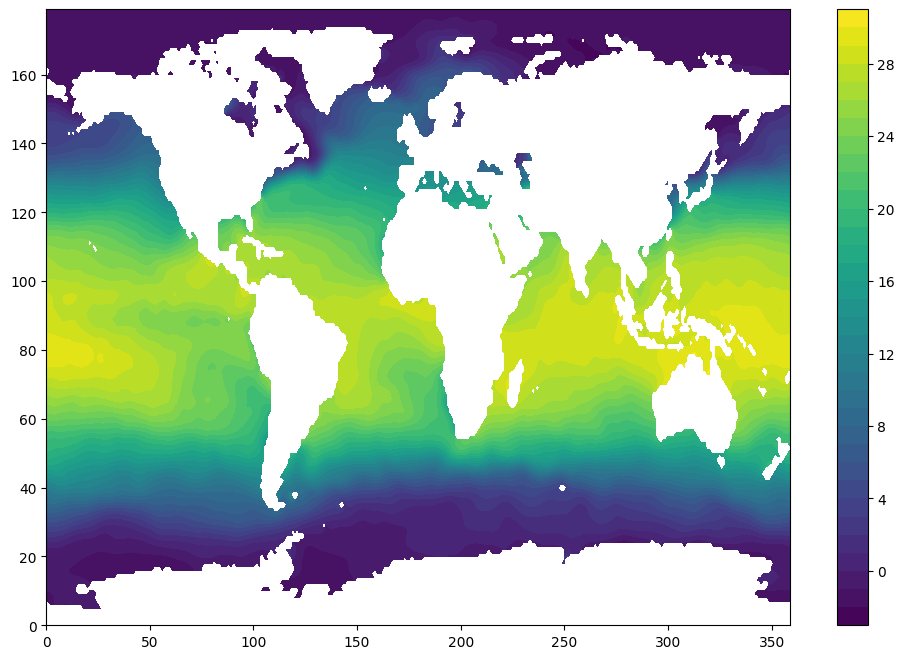

In [37]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

# These lines do the actual plotting
plt.contourf(data, 40)
plt.colorbar()
plt.show()


In [38]:
lon = temp_data.variables['X']
lat = temp_data.variables['Y']

In [39]:
lonvals = lon[:]
latvals = lat[:]

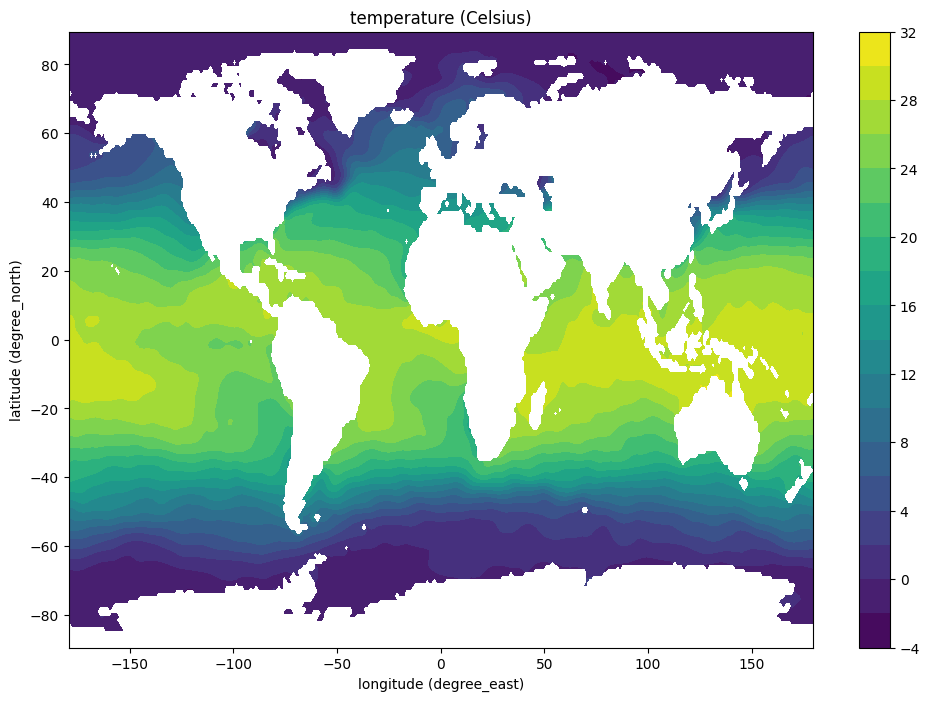

In [40]:
plt.title (pottmp.long_name + ' (' + pottmp.units + ')')
plt.xlabel(lon.long_name    + ' (' + lon.units    + ')')
plt.ylabel(lat.long_name    + ' (' + lat.units    + ')')
plt.contourf(lonvals, latvals, data, 20, cmap=plt.get_cmap('viridis'))
plt.colorbar()
plt.show()

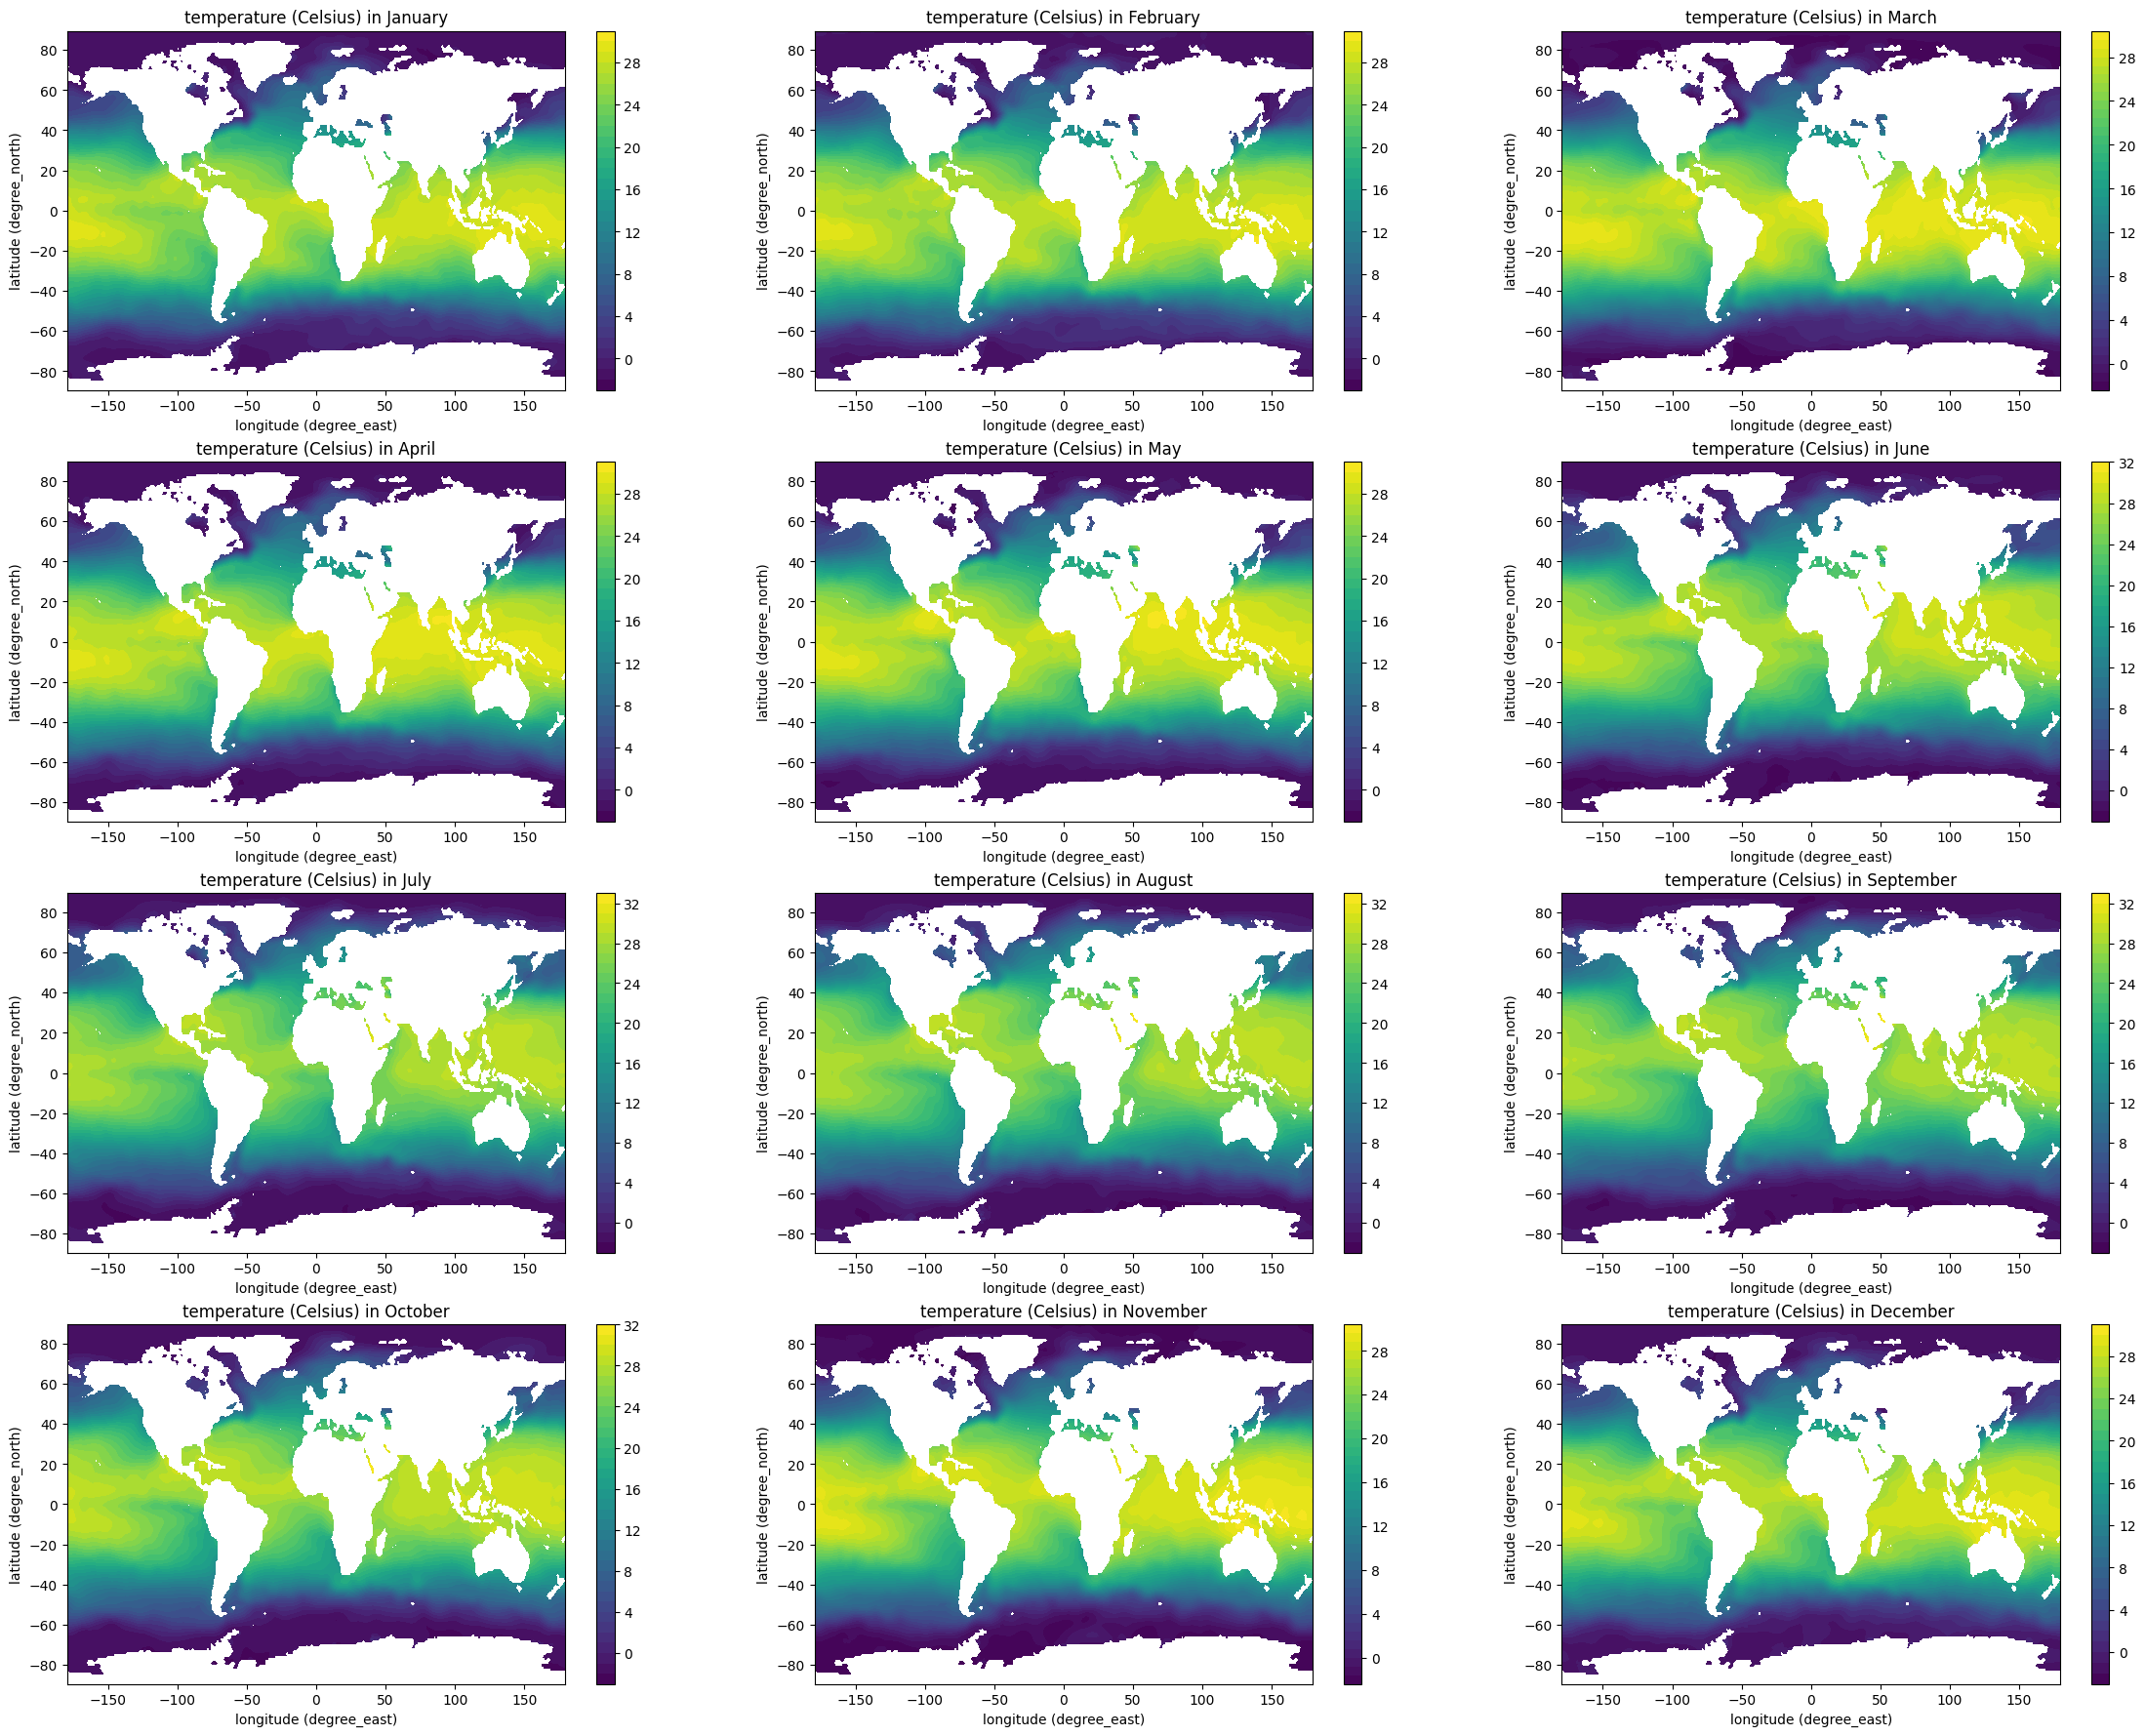

In [41]:
a=0
b=0
fig,ax = plt.subplots(4,3,figsize=(28, 22)) 
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(0,12):
    data2 = pottmp[i,0] 
    ax[a,b].set_title(pottmp.long_name + ' (' + pottmp.units + ')'+ ' in ' + month[i])
    ax[a,b].set_xlabel(lon.long_name    + ' (' + lon.units    + ')')
    ax[a,b].set_ylabel(lat.long_name    + ' (' + lat.units    + ')')
    obj = ax[a,b].contourf(lonvals, latvals, data2, 40, cmap=plt.get_cmap('viridis'))
    fig.colorbar(obj,ax = ax[a,b])
    
    if b == 2:
            a +=1
            b = 0
    else:
            b+=1
              
plt.show()

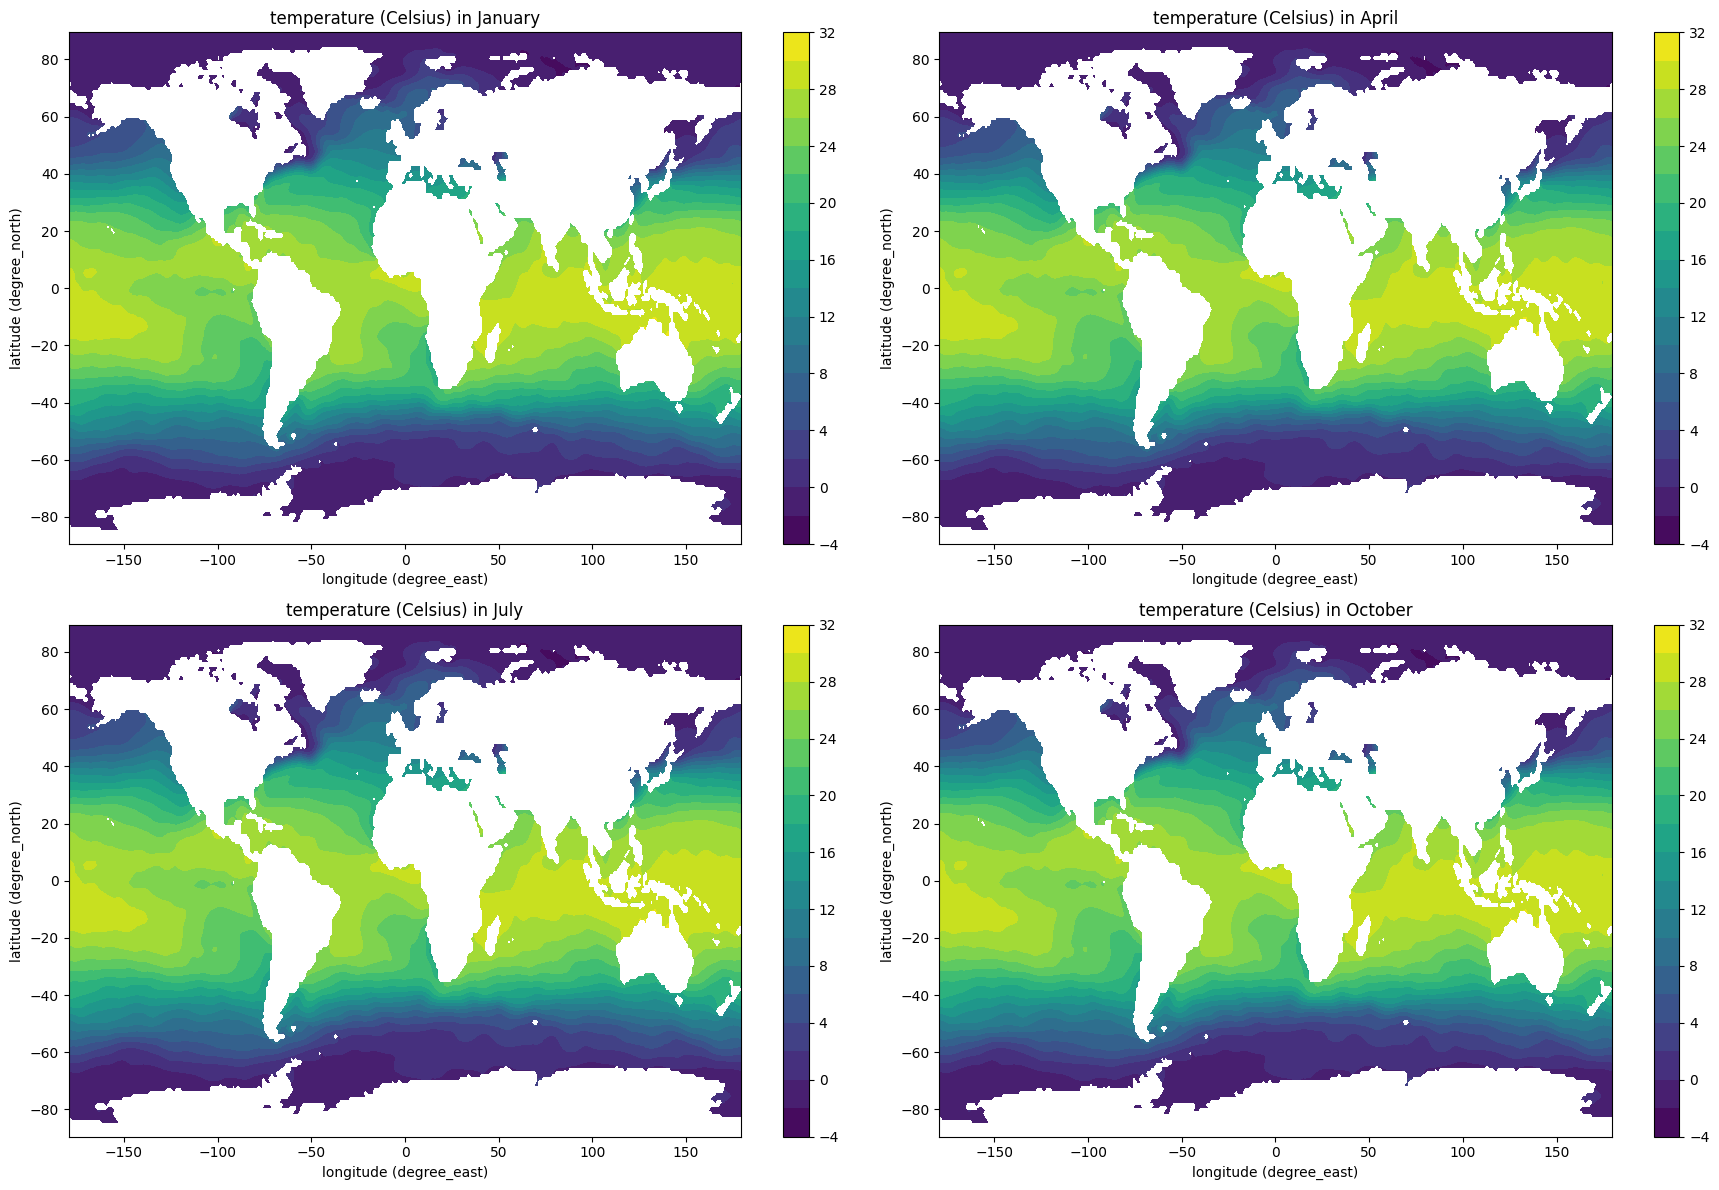

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))  # Adjust the size as needed for 4 subplots

# Months to plot
months_to_plot = ['January', 'April', 'July', 'October']

for i, month in enumerate(months_to_plot):
    # Assuming you have data for each month indexed from 0 to 11
    index_of_month = month.index(month)
    data2 = pottmp[index_of_month, 0]  # Assuming you have pottmp data for each month

    row = i // 2  # Row index for subplot
    col = i % 2   # Column index for subplot

    # Plotting each month
    obj = ax[row, col].contourf(lonvals, latvals, data2, 20, cmap=plt.get_cmap('viridis'))
    ax[row, col].set_title(f'{pottmp.long_name} ({pottmp.units}) in {month}')
    ax[row, col].set_xlabel(f'{lon.long_name} ({lon.units})')
    ax[row, col].set_ylabel(f'{lat.long_name} ({lat.units})')
    fig.colorbar(obj, ax=ax[row, col])

plt.tight_layout()
plt.show()


## Temperature: vertical distribution

In [43]:
#give me temperature values for all values of depth at the given latitude index and the 150th longitude index
#................[month,depth,lat,long]
 
profile1 = pottmp[7,:,20,150] 
profile2 = pottmp[7,:,40,150] 
profile3 = pottmp[7,:,60,150] 
profile4 = pottmp[7,:,80,150] 
profile5 = pottmp[7,:,100,150]

In [44]:
depthvar =  temp_data.variables['Z']
depthvals = depthvar[:]

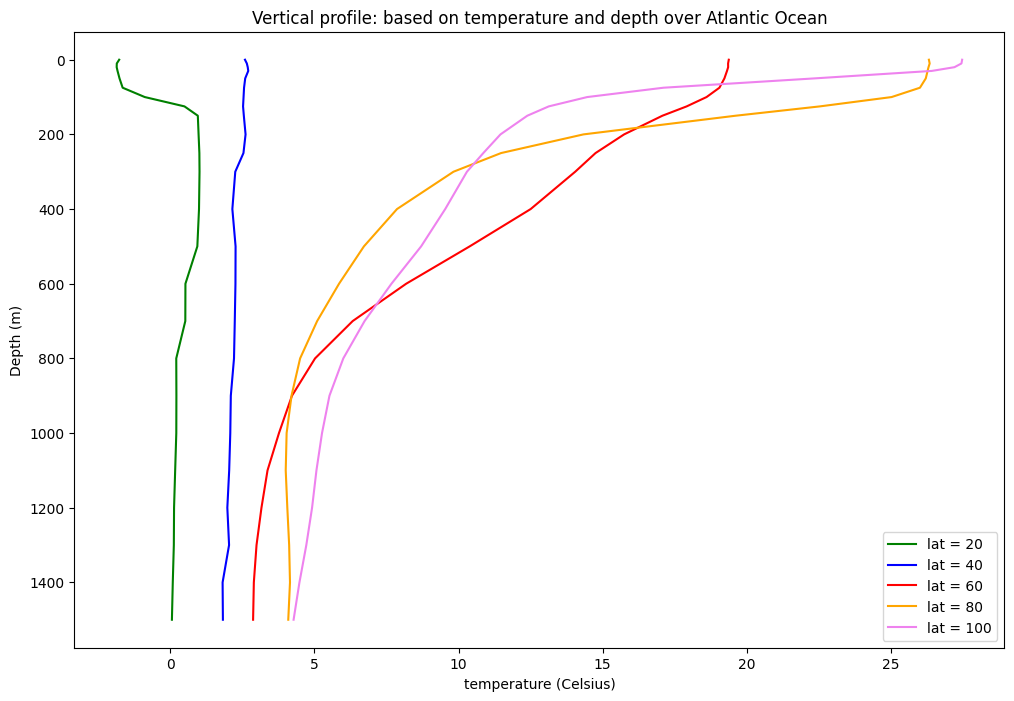

In [45]:
plt.plot(profile1, depthvals, color='green', label = "lat = 20")
plt.plot(profile2, depthvals, color='blue', label = "lat = 40")
plt.plot(profile3, depthvals, color='red', label = "lat = 60")
plt.plot(profile4, depthvals, color='orange', label = "lat = 80")
plt.plot(profile5, depthvals, color='violet', label = "lat = 100")

plt.xlabel(pottmp.long_name   + ' (' + pottmp.units   + ')')
plt.ylabel(depthvar.long_name + ' (' + depthvar.units + ')')
plt.legend()
plt.gca().invert_yaxis() # Gets the axes of the plot and reverses the y axis


plt.title('Vertical profile: based on temperature and depth over Atlantic Ocean')
plt.show()

# For Salinity


In [46]:
potsal = salt_data.variables['salinity']

In [47]:
potsal.dimensions

('T', 'Z', 'Y', 'X')

In [48]:
potsal.shape

(12, 24, 180, 360)

In [49]:
data = potsal[0,0]

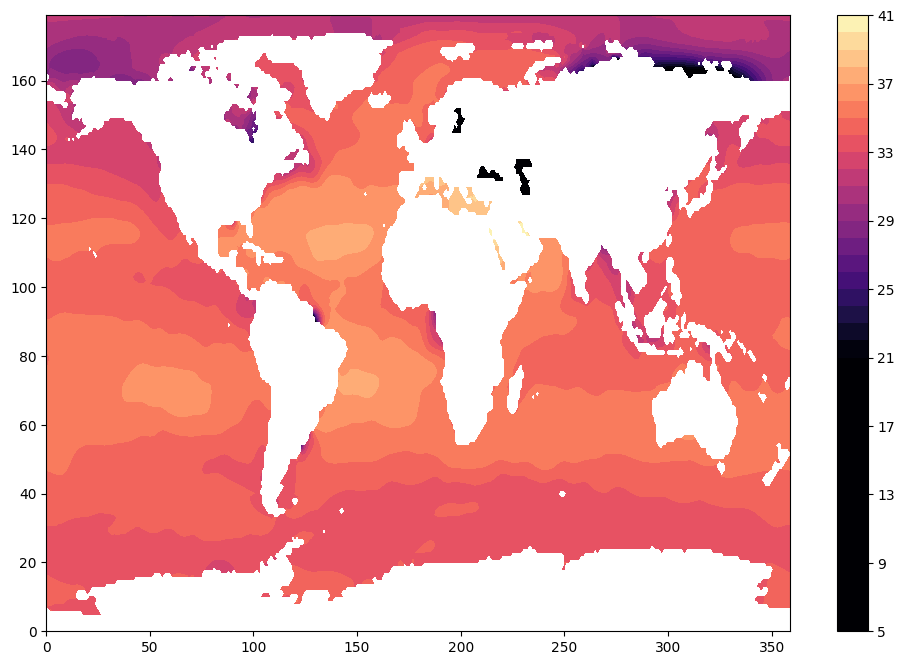

In [50]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

# These lines do the actual plotting
plt.contourf(data, 40,cmap=plt.get_cmap('magma'),vmin=21)
plt.colorbar()
plt.show()

In [51]:
lon = salt_data.variables['X']
lat = salt_data.variables['Y']

In [52]:
lonvals = lon[:]
latvals = lat[:]

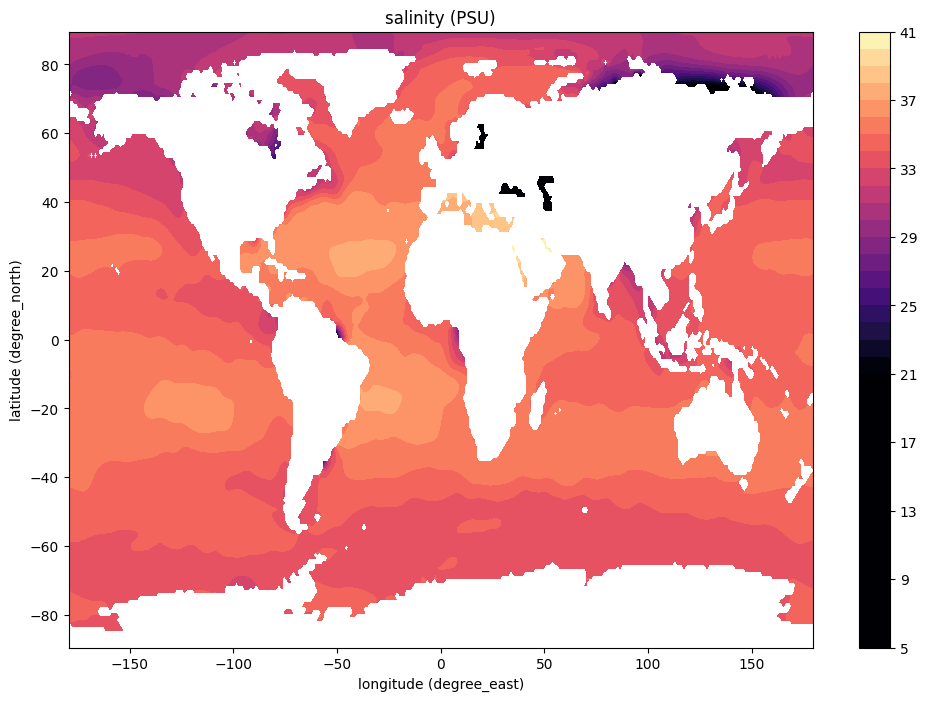

In [53]:
plt.title (potsal.long_name + ' (' + potsal.units + ')')
plt.xlabel(lon.long_name    + ' (' + lon.units    + ')')
plt.ylabel(lat.long_name    + ' (' + lat.units    + ')')
plt.contourf(lonvals, latvals, data, 40, cmap=plt.get_cmap('magma'),vmin=21)
plt.colorbar()
plt.show()

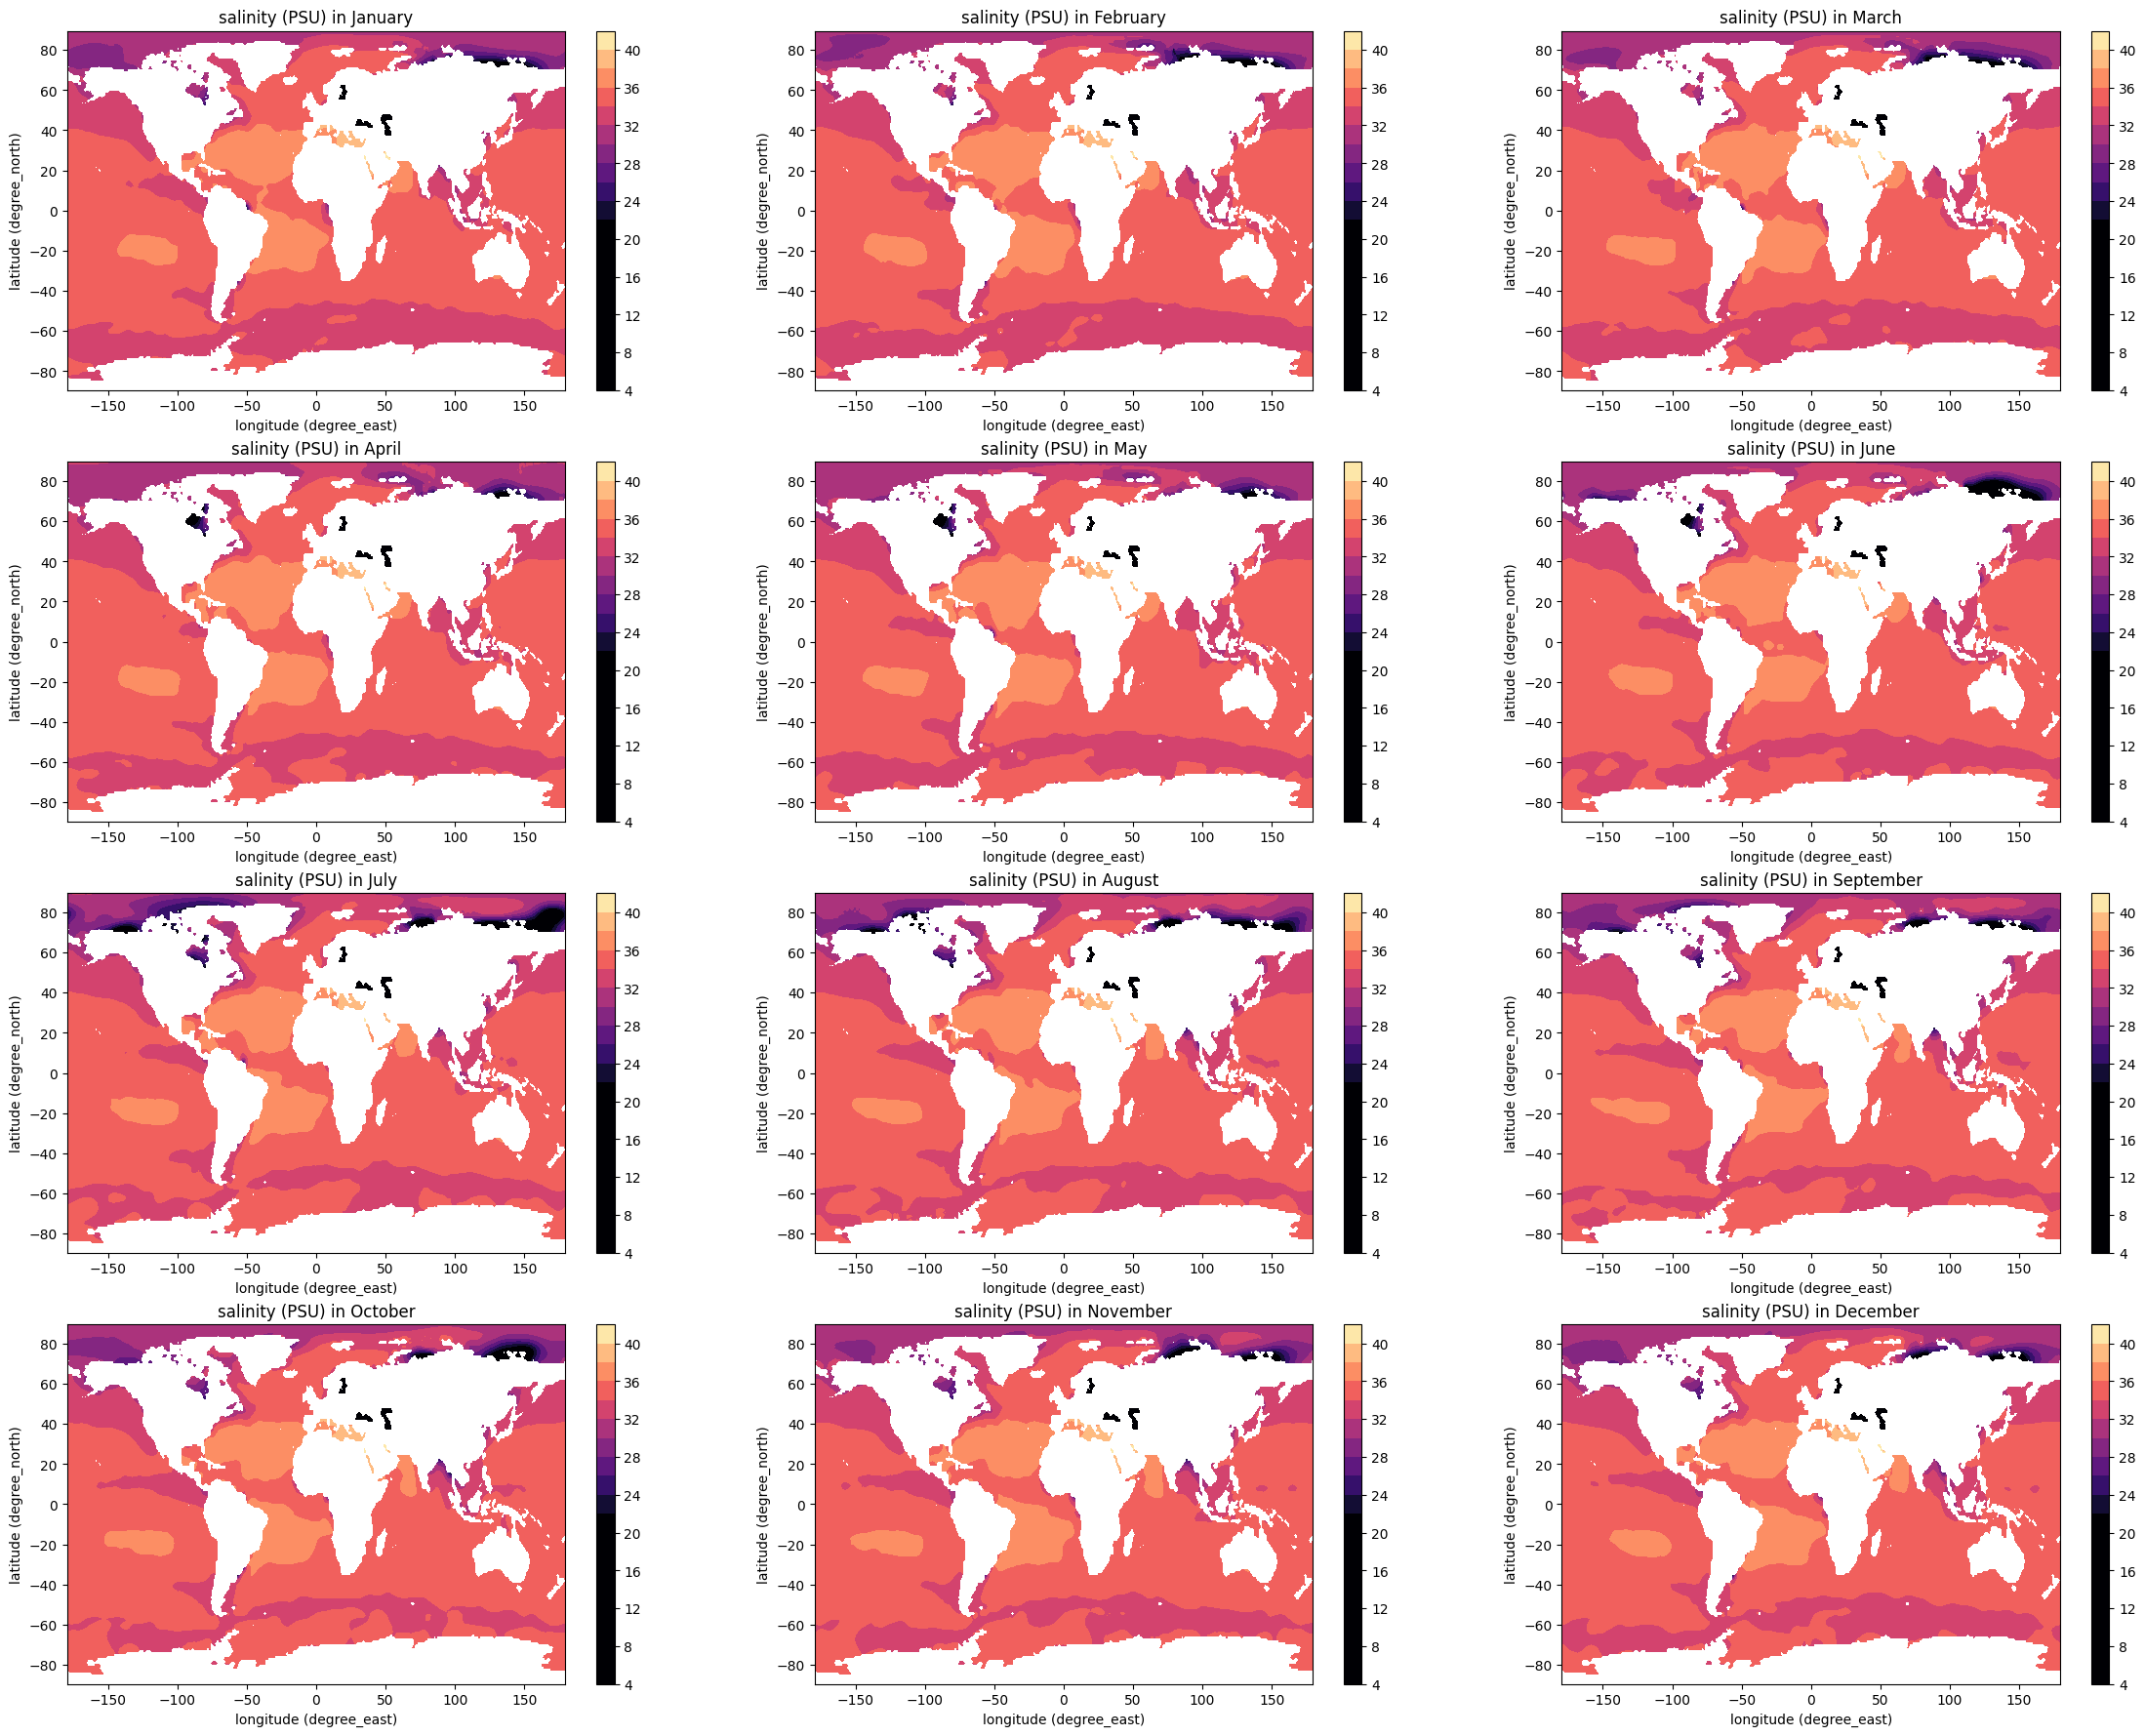

In [54]:
a=0
b=0
fig,ax = plt.subplots(4,3,figsize=(28, 22)) 
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(0,12):
    data2 = potsal[i,0] 
    ax[a,b].set_title(potsal.long_name + ' (' + potsal.units + ')'+ ' in ' + month[i])
    ax[a,b].set_xlabel(lon.long_name    + ' (' + lon.units    + ')')
    ax[a,b].set_ylabel(lat.long_name    + ' (' + lat.units    + ')')
    obj = ax[a,b].contourf(lonvals, latvals, data2, 20, cmap=plt.get_cmap('magma'),vmin=21)
    fig.colorbar(obj,ax = ax[a,b])
    
    if b == 2:
            a +=1
            b = 0
    else:
            b+=1
              
plt.show()

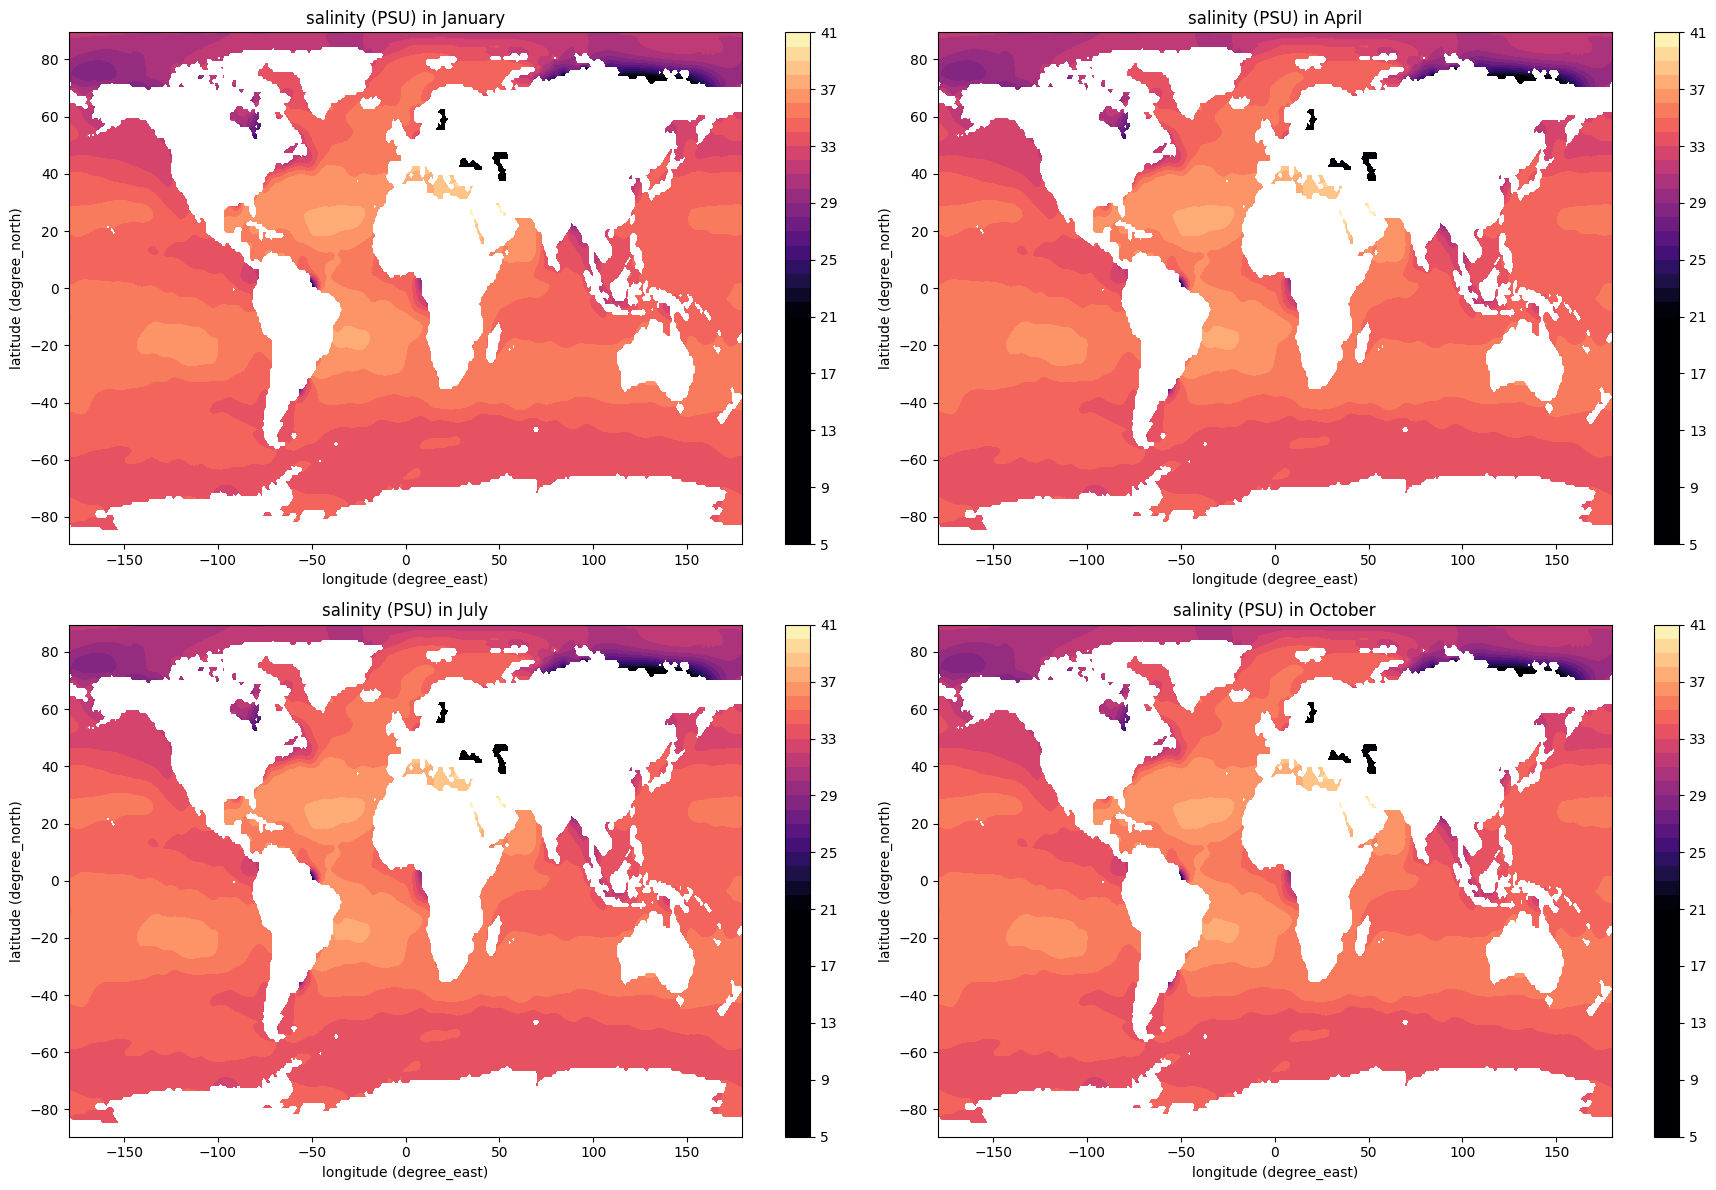

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))  # Adjust the size as needed for 4 subplots

# Months to plot
months_to_plot = ['January', 'April', 'July', 'October']

for i, month in enumerate(months_to_plot):
    # Assuming you have data for each month indexed from 0 to 11
    index_of_month = month.index(month)
    data2 = potsal[index_of_month, 0]  # Assuming you have potsal data for each month

    row = i // 2  # Row index for subplot
    col = i % 2   # Column index for subplot

    # Plotting each month
    obj = ax[row, col].contourf(lonvals, latvals, data2, 40, cmap=plt.get_cmap('magma'), vmin=21)
    ax[row, col].set_title(f'{potsal.long_name} ({potsal.units}) in {month}')
    ax[row, col].set_xlabel(f'{lon.long_name} ({lon.units})')
    ax[row, col].set_ylabel(f'{lat.long_name} ({lat.units})')
    fig.colorbar(obj, ax=ax[row, col])

plt.tight_layout()
plt.show()


### Salinity: Vertical profile

In [56]:
#give me salinity for all values of depth at the given latitude index and the 150th longitude index
#................[month,depth,lat,long]
 
profile1 = potsal[7,:,20,150] 
profile2 = potsal[7,:,40,150] 
profile3 = potsal[7,:,60,150] 
profile4 = potsal[7,:,80,150] 
profile5 = potsal[7,:,100,150]

In [57]:
depthvar =  salt_data.variables['Z']
depthvals = depthvar[:]

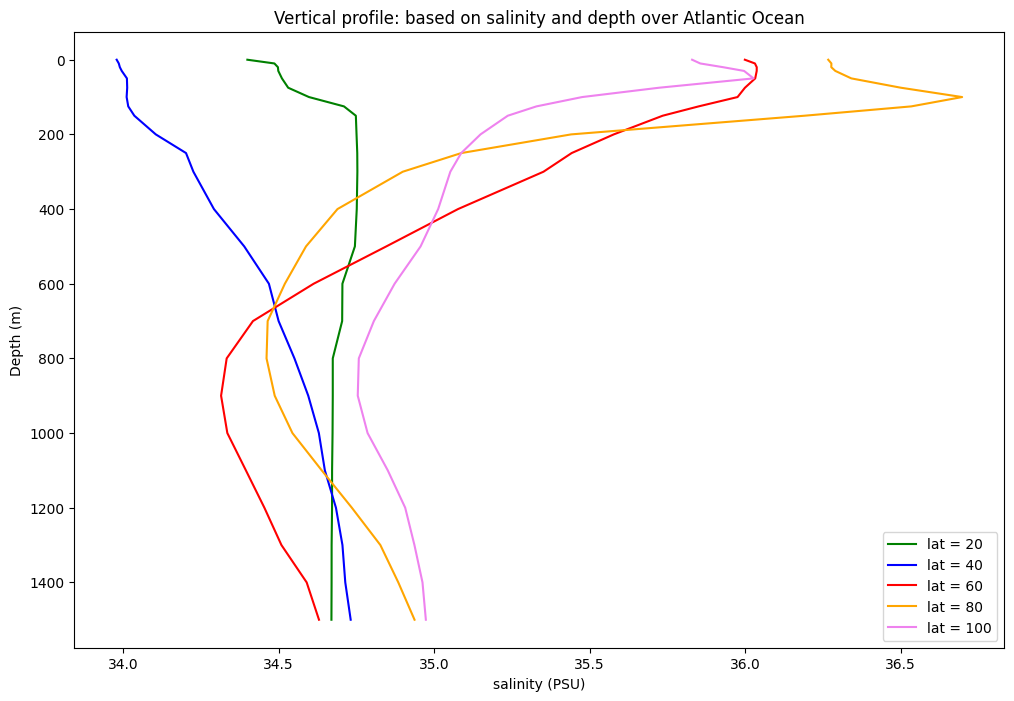

In [61]:
plt.plot(profile1, depthvals, color='green', label = "lat = 20")
plt.plot(profile2, depthvals, color='blue', label = "lat = 40")
plt.plot(profile3, depthvals, color='red', label = "lat = 60")
plt.plot(profile4, depthvals, color='orange', label = "lat = 80")
plt.plot(profile5, depthvals, color='violet', label = "lat = 100")

plt.xlabel(potsal.long_name   + ' (' + potsal.units   + ')')
plt.ylabel(depthvar.long_name + ' (' + depthvar.units + ')')
plt.legend(loc = "lower right")
plt.gca().invert_yaxis() # Gets the axes of the plot and reverses the y axis


plt.title('Vertical profile: based on salinity and depth over Atlantic Ocean')
plt.show()